# Motor de corrent continu d'excitació compound

## Condicions nominals

Podem representar la versió més senzilla d'aquest motor amb el següent esquema:

![](img/MaqElec/motorDCec.png)

Aplicant les llei de Kirchoff:

$\Large U - \varepsilon = I_i \cdot (r+R_s+R_a) \Rightarrow I_i = \frac{U-\varepsilon}{r+R_s+R_a} $

$\Large U = I_p \cdot R_p \Rightarrow I_p = \frac{U}{R_p}$

$\Large I = I_i + I_p$

## Comportamnet a l'engegada


Si anomenem $I_N$ el valor de la intensitat en condicions nominals, aquesta és la suma del valors nominals de $I_i$ i $I_p$.

$I_N = I_{iN} + I_{pN}$ 

si es pren un valor de $R_a$ tal que 

$I_iA = \alpha \cdot I_iN$ 

$1,5 \le \alpha \le 2,5$

El flux total és la suma dels generats per $I_i$ i $I_p$

$\Phi = c \cdot (I_{i} + I_p)$

A l'engegada s'incrementa només el flus generat per I_i:

$\Phi_A = c \cdot (I_{iA} + I_{pN}) = c \cdot (\alpha \cdot I_{iN} + I_{pN}) $

Si escrivim l'equació del moment per l'engegada i les condicions nominals i les dividim:

$ \Gamma_a = k \cdot \Phi_A \cdot I_{iA}$

$ \Gamma_N = k \cdot \Phi \cdot I_{iN}$



$\Large \frac{\Gamma_A}{\Gamma_N}  = \frac{\Phi_A}{\Phi_N} \cdot \frac{I_{iA}}{I_{iN}} = \frac{\alpha \cdot I_{iN} + I_{pN}}{I_{iN} + I_{pN}} \cdot \alpha = \frac{1}{I_N} (\alpha \cdot I_{pN} + \alpha^2 \cdot I_{iN})$

$\Large \Rightarrow  \Gamma_a =  \frac{1}{I_N} (\alpha \cdot I_{pN} + \alpha^2 \cdot I_{iN}) \cdot \Gamma_n$

Es a dir, tenim dos termes, un quadràtic i un linial. L'equil·libri de tots dos depèn dels valors de $R_s$ i $R_p$. Valors no equil·librats de $R_s$ i $R_p$ reproduirien els comportaments de l'excitació sèrie o de l'excitació shunt {cite}`Motor_compound`.

## Corbes característiques

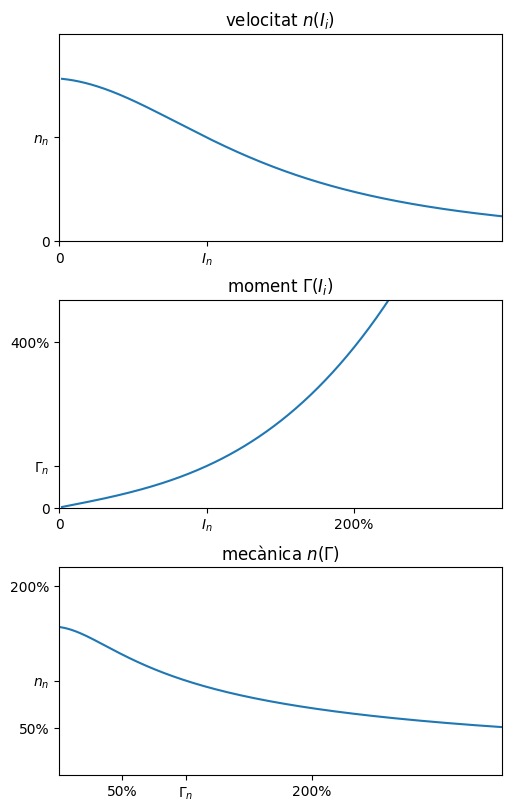

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
Ri=0.75
Re=0.25
Rp=6
Un=200
nn=800
In=15
En=Un-In*(Ri+Re)
Pn=In*En
Ip=Un/Rp
wn=nn*2*pi/60
kphin=En/wn
etan=Pn/(In*Un+Ip*Un)
gn=kphin*In
x = np.linspace(0.02, 3, 300)
I = x*In
It = I + Ip
g = (x*Ip+x**2*I)/(In+Ip)*gn 
e = Un-I*(Ri+Re)
kphi=(Ip+x*I)/(In+Ip)*kphin
w = e/kphi
eta=e*I/(Un*I+Un*Ip)

ffig, axs = plt.subplots(3, 1, figsize=(5, 8), layout='constrained')

axs[0].plot(I/In, w/wn)
axs[0].axis([0, 3, 0, 2])
axs[0].set_xticks([0,1], ['0','$I_n$'])
axs[0].set_yticks([0,1], ['0','$n_n$'])
axs[0].set_title('velocitat $n(I_i)$')

axs[1].plot(I/In, g/gn)
axs[1].axis([0, 3, 0, 5])
axs[1].set_xticks([0,1,2], ['0','$I_n$','200%'])
axs[1].set_yticks([0,1,4], ['0','$\Gamma_n$','400%'])
axs[1].set_title('moment $\Gamma(I_i)$')

axs[2].plot(g/gn, w/wn)
axs[2].axis([0, 3.5, 0, 2.2])
axs[2].set_yticks([0.5,1,2], ['50%','$n_n$','200%'])
axs[2].set_xticks([0.5,1,2], ['50%','$\Gamma_n$','200%'])
axs[2].set_title('mecànica $n(\Gamma)$')


plt.show()

## Aplicacions

Com les seves característiques són la barreja dels millors avantages del motor d'excitació shunt (velocitat constant en front de canvis de càrrega, fins i tot bruscs) i d'excitació sèrie (bon parell d'engegada).

Per això s'utilitza en bombes, màquines de pressió, trepants, grues, calandres, premses, llimadores i d'altres màquines on el motor sèrie podria tenir problemes amb el canvi violent de càrrega.

## Rendiment

Aquest motor té un rendiment nominal:

$$\Large \eta = \frac{P_u}{P_c} = \frac{\varepsilon \cdot I_i}{U \cdot I} = \frac{\varepsilon \cdot I_i}{U \cdot (I_i + I_p)}$$

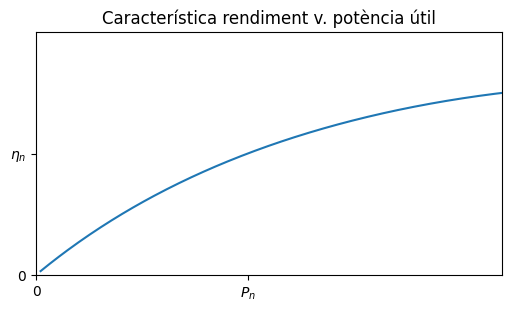

In [2]:
p=I*e

fig, ax = plt.subplots(1, 1, figsize=(5, 3), layout='constrained')

ax.plot(p/Pn, eta/etan)
ax.axis([0, 2.2, 0, 2])
ax.set_xticks([0,1], ['0','$P_n$'])
ax.set_yticks([0,1], ['0','$\eta_n$'])
ax.set_title('Característica rendiment v. potència útil')

plt.show()

## Comparació de parells d'engegada i corbess característiques.

Anen a finalitzar l'estudi dels motors de corrent continu amb una comparació de les seves característiques principals:


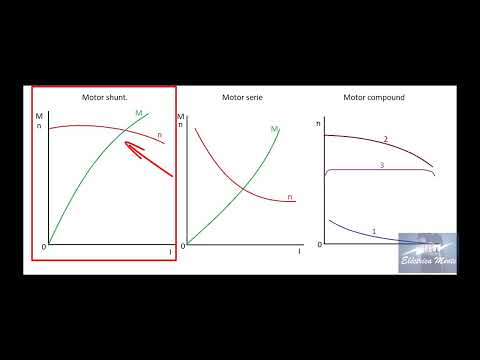

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('O6N4xiIssok')